<a href="https://colab.research.google.com/github/wanpingDou/Pytorch-Camp/blob/master/hello%20pytorch/lesson_jupyter/03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding:utf-8 -*-
"""
@file name  : lesson-03-Linear-Regression.py
@author     : TingsongYu https://github.com/TingsongYu
@date       : 2018-10-15
@brief      : 一元线性回归模型
"""
import torch
import matplotlib.pyplot as plt
torch.manual_seed(2020)

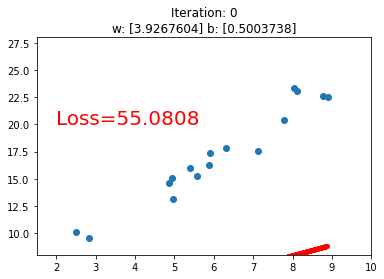

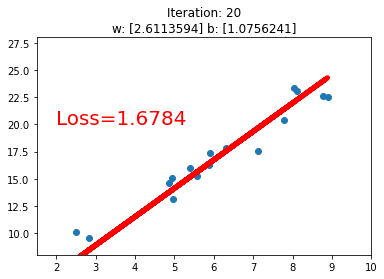

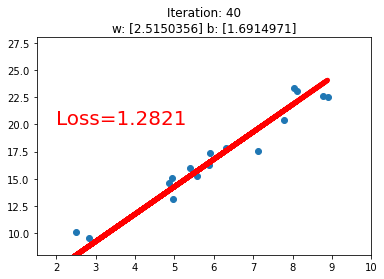

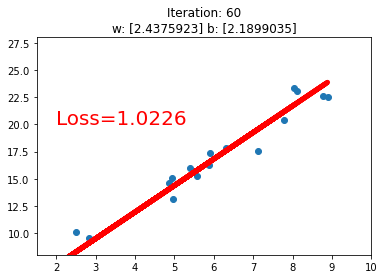

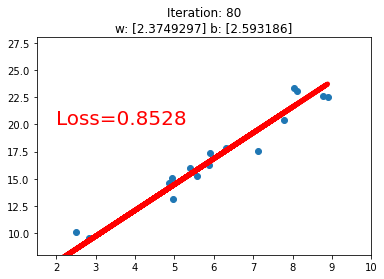

In [2]:
lr = 0.05  # 学习率    20191015修改

# 创建训练数据
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(1000):

    # 前向传播
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # 清零张量的梯度   20191015增加
    w.grad.zero_()
    b.grad.zero_()

    # 绘图
    if iteration % 20 == 0:

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        if loss.data.numpy() < 1:
            break